In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
sns.set(style="darkgrid",font_scale=1.5)


from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score,jaccard_score,log_loss,classification_report
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn import tree

### DATA PREPARATION

In [ ]:
df = pd.read_csv("Churn_Modelling.csv")

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
df.drop(columns=["Surname","RowNumber","CustomerId"],inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
cat_cols = ["Geography","Gender"]

for column in cat_cols:
    print(f"Unique Values in {column} column is:",df[column].unique())

Unique Values in Geography column is: ['France' 'Spain' 'Germany']
Unique Values in Gender column is: ['Female' 'Male']


In [ ]:
encoder = LabelEncoder()

df[cat_cols] = df[cat_cols].apply(encoder.fit_transform)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
X = df.drop(columns=["Exited"])
y = df["Exited"]

### VISUALISASI DATA

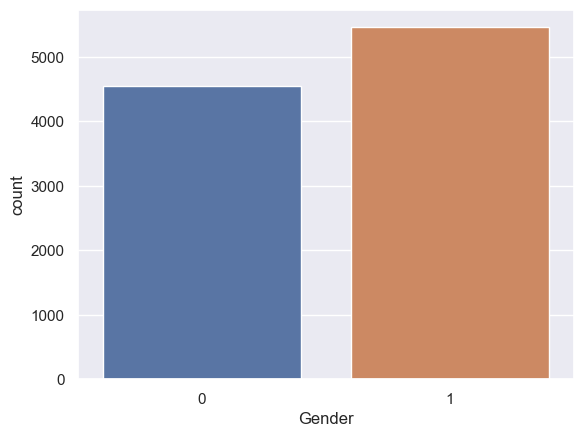

In [ ]:
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=df, x='Gender')

####  0 = FEMALE
####  1 = MALE

Text(0.5, 1.0, '% of Exited and Non Exicted Customers')

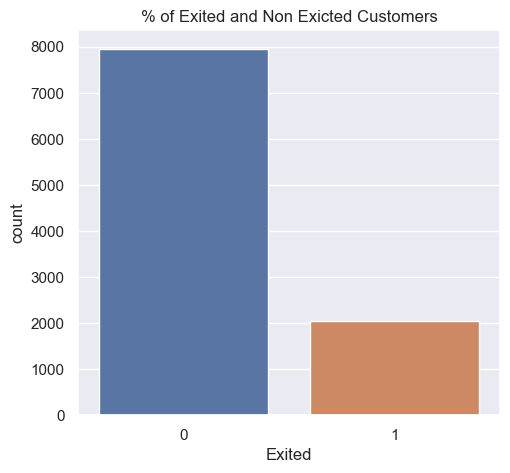

In [ ]:
#Exited and Non Exited Customers
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x='Exited',data=df)
plt.title("% of Exited and Non Exicted Customers")

<AxesSubplot: >

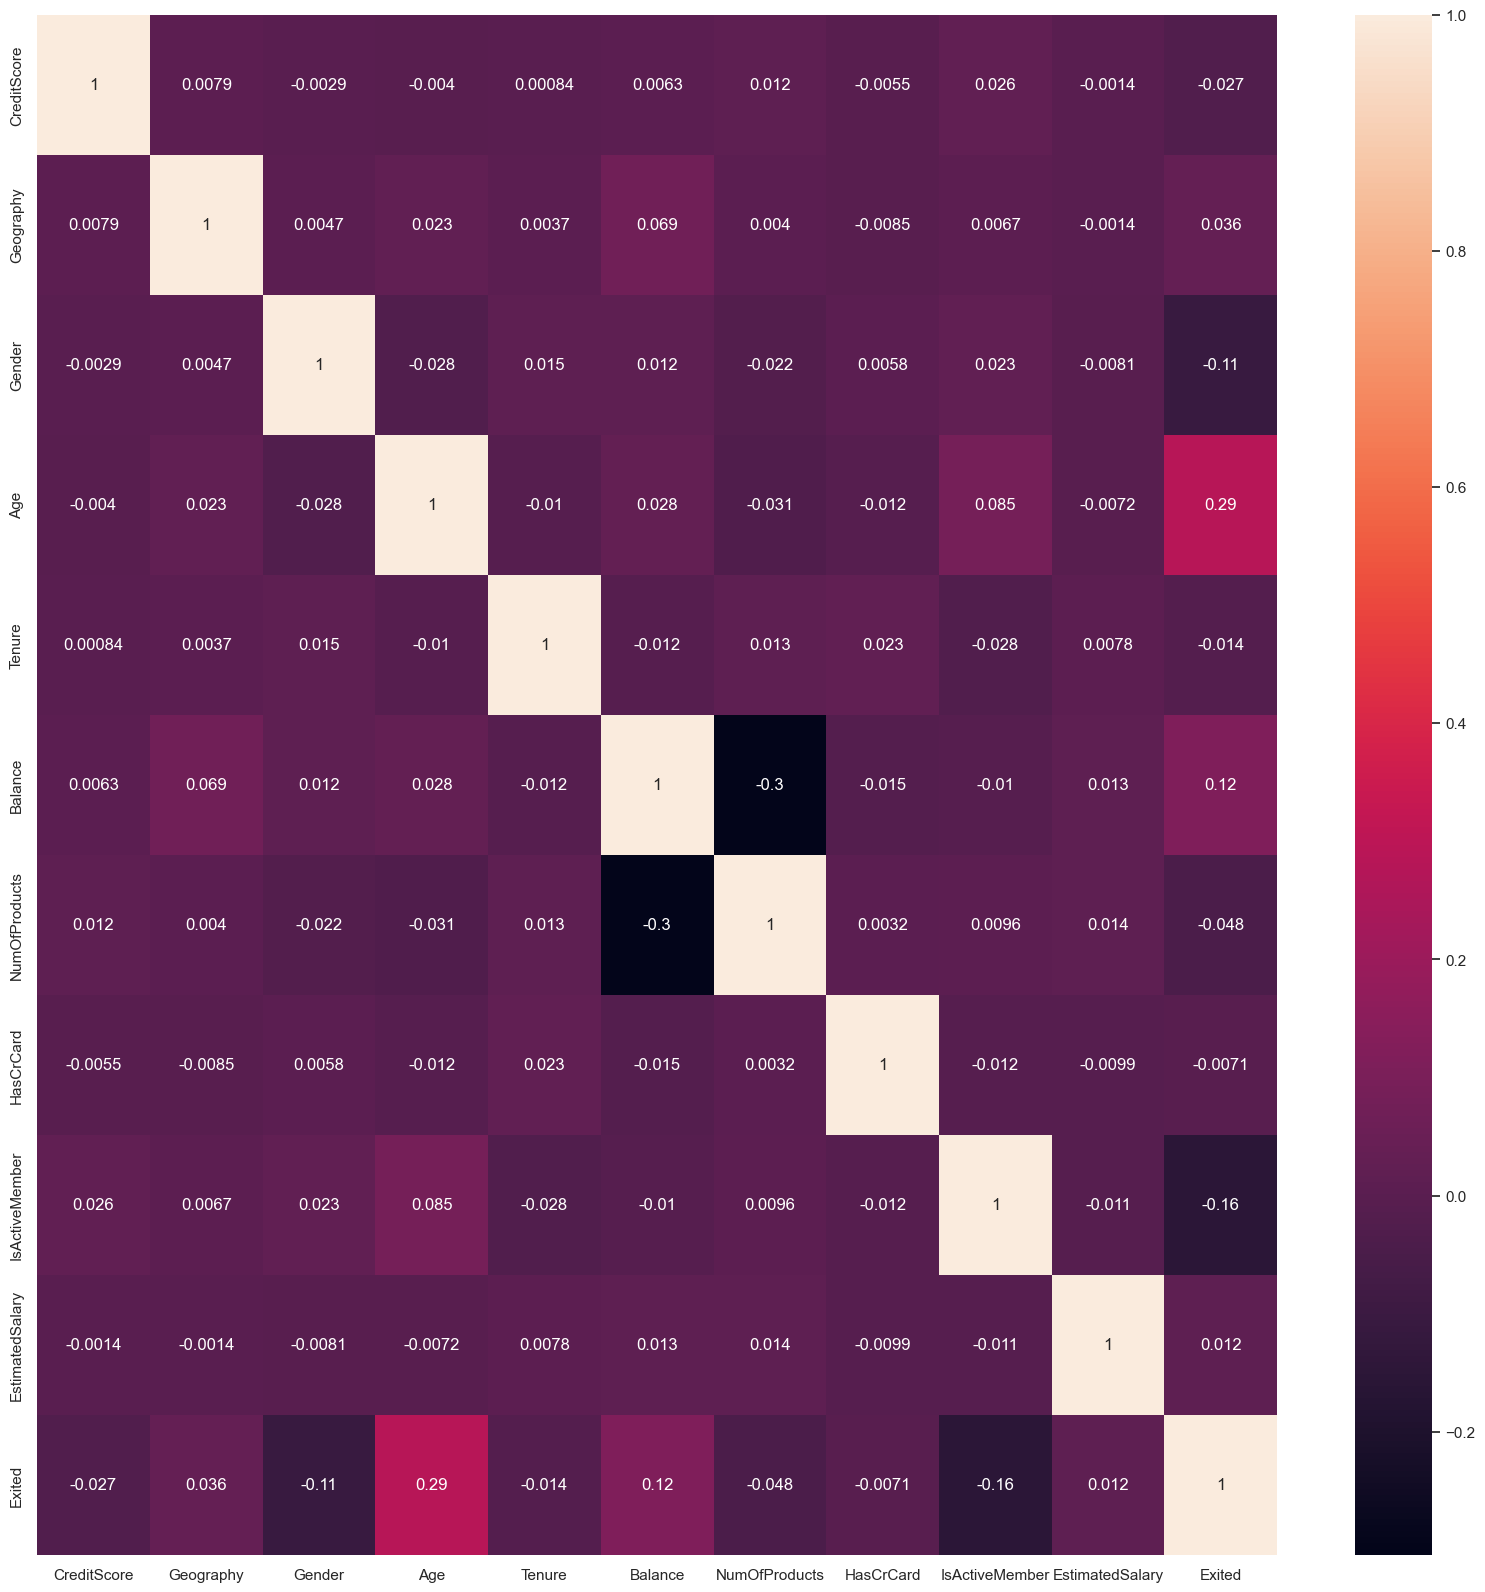

In [ ]:
corre=df.corr()
top_corr_features=corre.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_corr_features].corr(),annot=True)

### TRAINING & TESTING DATA

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

[Text(0.6646087451037854, 0.9807692307692307, 'X[3] <= 41.5\ngini = 0.5\nsamples = 7000\nvalue = [3500.0, 3500.0]'),
 Text(0.4826036961059012, 0.9423076923076923, 'X[6] <= 2.5\ngini = 0.445\nsamples = 4771\nvalue = [2651.952, 1334.746]'),
 Text(0.3602211159080512, 0.9038461538461539, 'X[6] <= 1.5\ngini = 0.425\nsamples = 4675\nvalue = [2635.655, 1161.723]'),
 Text(0.21392704997712716, 0.8653846153846154, 'X[3] <= 34.5\ngini = 0.49\nsamples = 2292\nvalue = [1205.946, 909.605]'),
 Text(0.09233295688472096, 0.8269230769230769, 'X[1] <= 0.5\ngini = 0.451\nsamples = 1231\nvalue = [681.322, 355.932]'),
 Text(0.04434826738334858, 0.7884615384615384, 'X[5] <= 57593.773\ngini = 0.387\nsamples = 642\nvalue = [369.18, 131.003]'),
 Text(0.022129460201280877, 0.75, 'X[9] <= 176057.148\ngini = 0.496\nsamples = 132\nvalue = [68.32, 56.85]'),
 Text(0.015439158279963403, 0.7115384615384616, 'X[3] <= 32.5\ngini = 0.473\nsamples = 117\nvalue = [63.306, 39.548]'),
 Text(0.009835315645013724, 0.67307692307

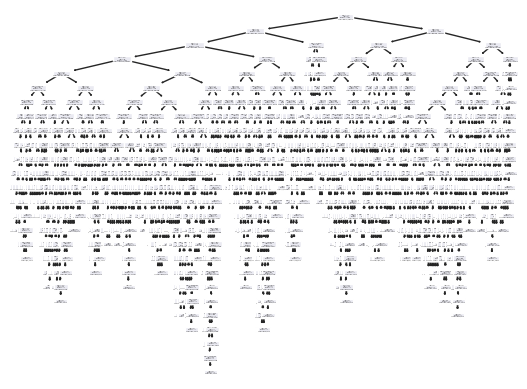

In [ ]:
dtree = tree.DecisionTreeClassifier(class_weight="balanced")
dtree.fit(x_train,y_train)
tree.plot_tree(dtree)

In [ ]:
y_train_pred = dtree.predict(x_train)
y_test_pred = dtree.predict(x_test)

print("Accuracy Score of Model on Training Data is =>",round(accuracy_score(y_train,y_train_pred)*100,2),"%")
print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(y_test,y_test_pred)*100,2),"%")

Accuracy Score of Model on Training Data is => 100.0 %
Accuracy Score of Model on Testing Data  is => 79.07 %


In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5584
           1       1.00      1.00      1.00      1416

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000



In [ ]:
print("F1 Score of the Model tunning hyperparameter is =>",f1_score(y_test,y_test_pred,average="micro"))

F1 Score of the Model tunning hyperparameter is => 0.7906666666666666


In [ ]:
param_grid = {  "criterion":["gini","entropy"],
                "max_depth":[3,4,5,6,7,8],
                "min_samples_split":[2,3,4],
                "min_samples_leaf":[1,2,3,4]
             }

In [ ]:
grid_search = GridSearchCV(dtreetunning, param_grid, cv=5, n_jobs=-1)

grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4]})

In [ ]:
print("Best Parameters are:\n")
print(grid_search.best_params_)

Best Parameters are:

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [ ]:
dtree_with_hyper = tree.DecisionTreeClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=3, criterion="gini")

dtree_with_hyper.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=3)

[Text(0.5669309701492538, 0.9375, 'X[3] <= 42.5\ngini = 0.323\nsamples = 7000\nvalue = [5584, 1416]'),
 Text(0.34328358208955223, 0.8125, 'X[6] <= 2.5\ngini = 0.209\nsamples = 4991\nvalue = [4398, 593]'),
 Text(0.22761194029850745, 0.6875, 'X[6] <= 1.5\ngini = 0.188\nsamples = 4883\nvalue = [4371, 512]'),
 Text(0.11940298507462686, 0.5625, 'X[3] <= 38.5\ngini = 0.28\nsamples = 2394\nvalue = [1991, 403]'),
 Text(0.05970149253731343, 0.4375, 'X[1] <= 0.5\ngini = 0.237\nsamples = 1847\nvalue = [1593, 254]'),
 Text(0.029850746268656716, 0.3125, 'X[5] <= 180848.477\ngini = 0.185\nsamples = 959\nvalue = [860, 99]'),
 Text(0.014925373134328358, 0.1875, 'X[5] <= 57593.773\ngini = 0.173\nsamples = 933\nvalue = [844, 89]'),
 Text(0.007462686567164179, 0.0625, 'gini = 0.302\nsamples = 210\nvalue = [171, 39]'),
 Text(0.022388059701492536, 0.0625, 'gini = 0.129\nsamples = 723\nvalue = [673, 50]'),
 Text(0.04477611940298507, 0.1875, 'X[2] <= 0.5\ngini = 0.473\nsamples = 26\nvalue = [16, 10]'),
 Text

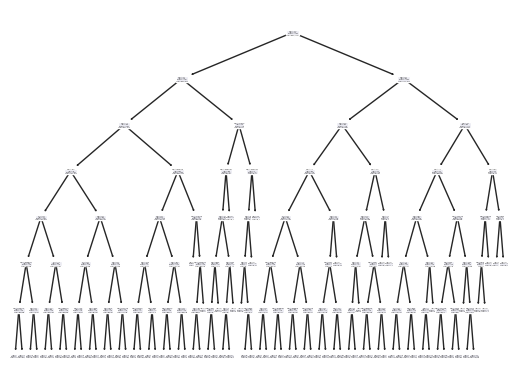

In [ ]:
tree.plot_tree(dtree_with_hyper)

In [ ]:
y_train_pred_hyper = dtree_with_hyper.predict(x_train)
y_test_pred_hyper = dtree_with_hyper.predict(x_test)

print("Accuracy Score of Model tunning hyperparameter on Training Data is =>",round(accuracy_score(y_train,y_train_pred_hyper)*100,2),"%")
print("Accuracy Score of Model tunning hyperparameter on Testing Data  is =>",round(accuracy_score(y_test,y_test_pred_hyper)*100,2),"%")

Accuracy Score of Model tunning hyperparameter on Training Data is => 86.99 %
Accuracy Score of Model tunning hyperparameter on Testing Data  is => 85.77 %
